# Titanic Lojistic Regresyon

In [1]:
import pandas as pd
import numpy as np
df= pd.read_csv('train.csv')
df= df.dropna()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [2]:
df['Embarked'].unique()

array(['C', 'S', 'Q'], dtype=object)

In [3]:
df['Sex']= pd.get_dummies(df['Sex'])

In [4]:
df['Embarked']= df['Embarked'].replace({"C":0,"S":1,"Q":2})

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
PassengerId    183 non-null int64
Survived       183 non-null int64
Pclass         183 non-null int64
Name           183 non-null object
Sex            183 non-null uint8
Age            183 non-null float64
SibSp          183 non-null int64
Parch          183 non-null int64
Ticket         183 non-null object
Fare           183 non-null float64
Cabin          183 non-null object
Embarked       183 non-null int64
dtypes: float64(2), int64(6), object(3), uint8(1)
memory usage: 22.3+ KB


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,1
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,1


In [ ]:
Yolcu sayısı : , Sınıfı : , cinsiyeti : ,Yaşı:,  SibSp:,	Parch:,Ücteri: ,Embarked: olan ların 

In [104]:
df['Fare'].value_counts

<bound method IndexOpsMixin.value_counts of 1      71.2833
3      53.1000
6      51.8625
10     16.7000
11     26.5500
        ...   
871    52.5542
872     5.0000
879    83.1583
887    30.0000
889    30.0000
Name: Fare, Length: 183, dtype: float64>

In [95]:
X = df.drop(["Survived","Name","Ticket","Cabin"], axis=1)
y= df['Survived']

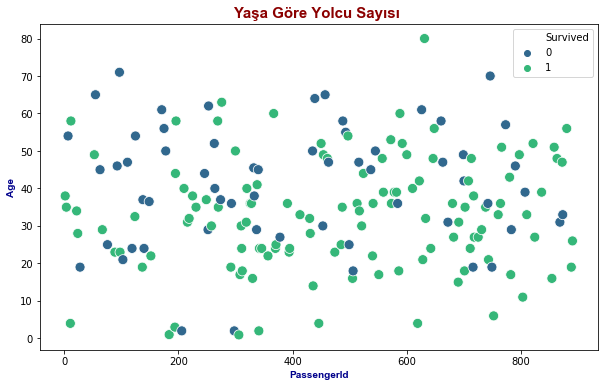

In [88]:
import seaborn as sns 
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,6))
sns.scatterplot(X.iloc[:,0], X.iloc[:,3], s=100 , hue= y, palette="viridis")
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.title("Yaşa Göre Yolcu Sayısı ", fontdict = baslik_font)
plt.xlabel("PassengerId", fontdict = eksen_font)
plt.ylabel("Age", fontdict = eksen_font)
plt.show()

# Modelleme 

In [96]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111)

In [100]:
import warnings
warnings.filterwarnings('ignore')
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
egitim_dogruluk = log_reg.score(X_train, y_train) #.score = R squared 
test_dogruluk = log_reg.score(X_test, y_test)
print('One-vs-rest', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu : 0.75
Modelin test verisindeki doğruluğu   : 0.78


In [102]:
log_reg_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_mnm.fit(X_train, y_train)
egitim_dogruluk = log_reg_mnm.score(X_train, y_train)
test_dogruluk = log_reg_mnm.score(X_test, y_test)
print('Multinomial (Softmax)', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

Multinomial (Softmax)
--------------------
Modelin eğitim verisindeki doğruluğu : 0.75
Modelin test verisindeki doğruluğu   : 0.78


In [106]:
tahmin_değerleri = np.array([[8,2,1,47,1,0,5,0] , [6,3,2,33,0,1,52,1]])
print(log_reg.predict(tahmin_değerleri))

[1 1]


Yolcu sayısı :8 , Sınıfı :2 , cinsiyeti :Erkek ,Yaşı:47,  SibSp:1,Parch:0,Ücteri:5 ,Embarked:0 olanların Hayatta kalma durumu = 1 dir. <br>
Yolcu sayısı :6 , Sınıfı :3 , cinsiyeti :Kadın ,Yaşı:33,  SibSp:0,Parch:1,Ücteri:52 ,Embarked:1 olanların Hayatta kalma durumu = 1 dir.

In [107]:
C_değerleri = [0.001,0.01,0.1,1,10,100, 1000]
dogruluk_df = pd.DataFrame(columns = ['C_Değeri','Doğruluk'])

dogruluk_değerleri = pd.DataFrame(columns=['C Değeri', 'Eğitim Doğruluğu', 'Test Doğruluğu'])

for c in C_değerleri:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_train,y_train)
    dogruluk_değerleri = dogruluk_değerleri.append({'C Değeri': c,
                                                    'Eğitim Doğruluğu' : lr.score(X_train,y_train),
                                                    'Test Doğruluğu': lr.score(X_test, y_test)
                                                    }, ignore_index=True)
display(dogruluk_değerleri)  

,C Değeri,Eğitim Doğruluğu,Test Doğruluğu
0,0.001,0.684932,0.756757
1,0.010,0.726027,0.756757
2,0.100,0.787671,0.783784
3,1.000,0.753425,0.783784
4,10.000,0.746575,0.783784
5,100.000,0.746575,0.783784
6,1000.000,0.746575,0.783784


Doğruluk değerlerine baktığımızda veri kümemiz için en uygun c değerinin yine varsayılan değer olan 0.100 olduğunu görüyoruz.